<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-4-yiheng/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 4

# 1. Exploratory Analysis

Use the following code to download the dataset from
[https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook](https://www.kaggle.com/code/mineshjethva/eda-pulsedb/notebook). The dataset is described in the paper [https://doi.org/10.3389/fdgth.2022.1090854](https://doi.org/10.3389/fdgth.2022.1090854).

I would recommend saving the data files to a google drive (or your local machine) so that you don't have to download them again. Note that the 5 data files correspond to the 5 columns in Table 4 of the paper.


In [ ]:
# download the data from kagglehub
# The dataset is 17.3 G
# This took about 15min using university wifi and, if
# you save the data, you should only have to do it once

import kagglehub
path = kagglehub.dataset_download("weinanwangrutgers/pulsedb-balanced-training-and-testing")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pulsedb-balanced-training-and-testing' dataset.
Path to dataset files: /kaggle/input/pulsedb-balanced-training-and-testing


In [ ]:
# run this block to move the data to a permanent directory in your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"
!mkdir -p $DATA_DIR
!cp -r $path/* $DATA_DIR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# run this block after data is saved to your drive

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

mat_files = sorted(glob.glob(os.path.join(DATA_DIR, "**", "*.mat"), recursive=True))
print(f"Found {len(mat_files)} .mat files")
for f in mat_files:
    print(" -", f)

Mounted at /content/drive
Found 5 .mat files
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_AAMI_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_CalFree_Test_Subset.mat
 - /content/drive/MyDrive/pulsedb/VitalDB_Train_Subset.mat


Now we'll load the data. The data is about 20GB, which exceeds the colab basic RAM allocation. You can check your RAM using

`!cat /proc/meminfo`

You should upgrade to colab pro, which is free for students.

[https://colab.research.google.com/signup](https://colab.research.google.com/signup)

Then in 'change runtime type' click A100 GPU and high RAM.

In [4]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

# !cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

DATA_DIR = "/content/drive/MyDrive/pulsedb/"
df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_Train_Subset.mat')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# df_CalBased_Test has 51720 entries
print(df_CalBased_Test.keys())
print(df_CalBased_Test.info())
print(df_CalBased_Test.describe())
df_CalBased_Test

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51720 entries, 0 to 51719
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      51720 non-null  float64
 1   BMI      51720 non-null  float64
 2   DBP      51720 non-null  float64
 3   Gender   51720 non-null  int64  
 4   Height   51720 non-null  float64
 5   SBP      51720 non-null  float64
 6   Subject  51720 non-null  object 
 7   Weight   51720 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 3.2+ MB
None
                Age           BMI           DBP        Gender        Height  \
count  51720.000000  51720.000000  51720.000000  51720.000000  51720.000000   
mean      58.980684     22.918826     62.936572      0.576953    162.502790   
std       15.032644      3.437789     12.070353      0.494048      9.641087   
min        0.400000     12.400000   

,Age,BMI,DBP,Gender,Height,SBP,Subject,Weight
0,48.0,20.7,68.482123,1,177.4,116.804871,p000001_1,65.0
1,48.0,20.7,66.047147,1,177.4,113.288819,p000001_1,65.0
2,48.0,20.7,66.378229,1,177.4,113.340180,p000001_1,65.0
3,48.0,20.7,59.910707,1,177.4,95.062698,p000001_1,65.0
4,48.0,20.7,89.850848,1,177.4,140.302555,p000001_1,65.0
...,...,...,...,...,...,...,...,...
51715,79.0,22.1,48.225986,1,169.6,109.266631,p006090_1,63.5
51716,79.0,22.1,48.607110,1,169.6,108.695099,p006090_1,63.5
51717,79.0,22.1,55.178004,1,169.6,110.514411,p006090_1,63.5
51718,79.0,22.1,47.861650,1,169.6,104.640197,p006090_1,63.5


In [ ]:
# 1293 subjects, 40 samples/ subject = 51720 samples
df_CalBased_Test['Subject'].value_counts()

,count
Subject,
p006090_1,40
p000001_1,40
p000003_1,40
p000005_1,40
p000012_1,40
...,...
p000063_1,40
p000064_1,40
p000074_1,40


In [ ]:
# summary statistics
print(df_Train.keys())
print(df_Train.info())
print(df_Train.describe())
df_Train

# missing data
print("missing data:")
features = ['Age', 'Gender', 'Height', 'Weight', 'BMI', 'SBP', 'DBP']
for feature in features:
    print(feature, df_Train[feature].isna().sum())

Index(['Age', 'BMI', 'DBP', 'Gender', 'Height', 'SBP', 'Subject', 'Weight'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465480 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      465480 non-null  float64
 1   BMI      465480 non-null  float64
 2   DBP      465480 non-null  float64
 3   Gender   465480 non-null  int64  
 4   Height   465480 non-null  float64
 5   SBP      465480 non-null  float64
 6   Subject  465480 non-null  object 
 7   Weight   465480 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 28.4+ MB
None
                 Age            BMI            DBP         Gender  \
count  465480.000000  465480.000000  465480.000000  465480.000000   
mean       58.980983      22.918767      62.915730       0.576953   
std        15.032404       3.437773      12.084088       0.494043   
min         0.400000      12.400000      16.226861       0.0000

In [ ]:
df_Train['Subject'].value_counts()

,count
Subject,
p006090_1,360
p000001_1,360
p000003_1,360
p000005_1,360
p000012_1,360
...,...
p000063_1,360
p000064_1,360
p000074_1,360


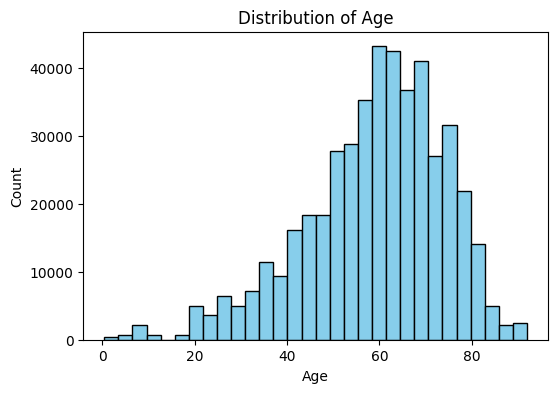

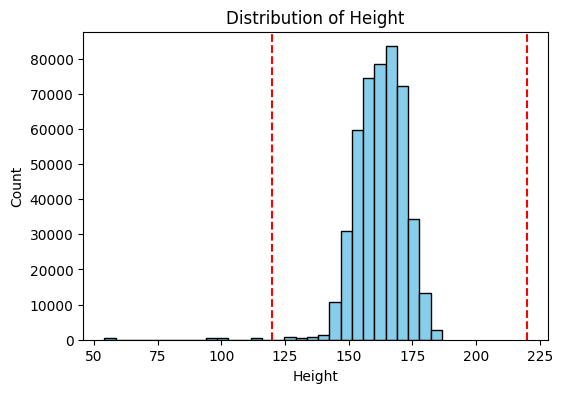

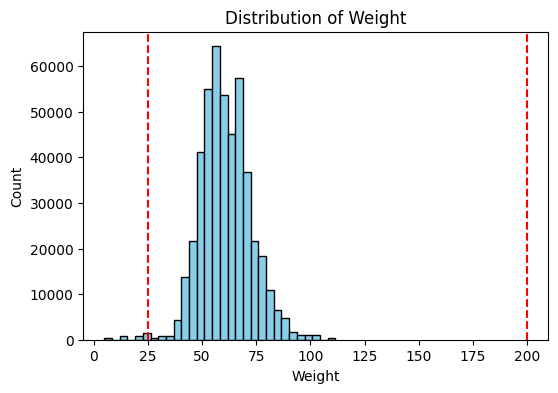

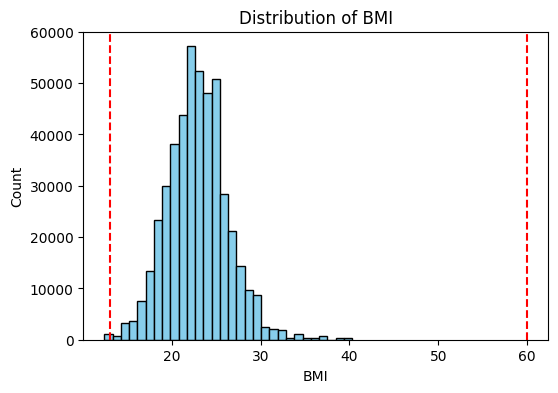

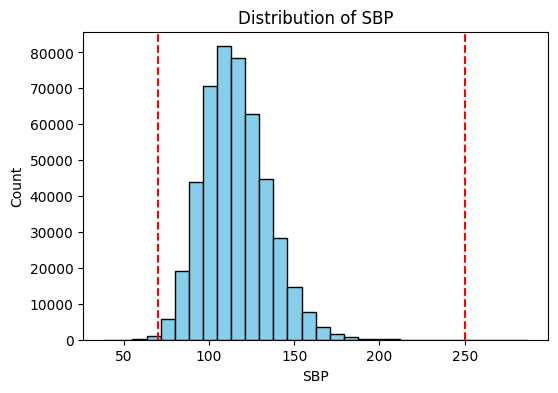

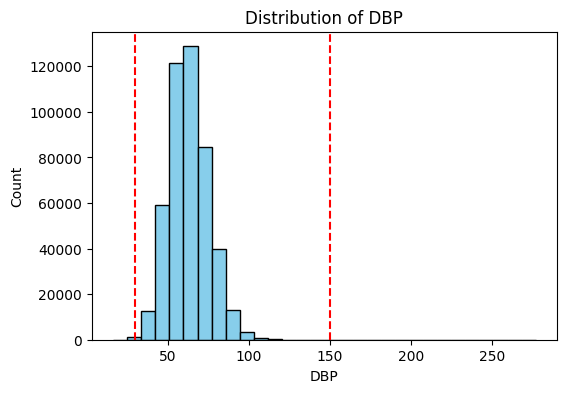

In [6]:
import matplotlib.pyplot as plt

features = ['Age', 'Height', 'Weight', 'BMI', 'SBP', 'DBP']
ranges = {
    'Height': (120, 220),
    'Weight': (25, 200),
    'BMI': (13, 60),
    'SBP': (70, 250),
    'DBP': (30, 150)
}

for f in features:
    plt.figure(figsize=(6,4))
    plt.hist(df_Train[f], bins=30, color='skyblue', edgecolor='black')
    if f in ranges:
      plt.axvline(ranges[f][0], color='red', linestyle='--')
      plt.axvline(ranges[f][1], color='red', linestyle='--')
    plt.title(f'Distribution of {f}')
    plt.xlabel(f)
    plt.ylabel('Count')
    plt.show()

In [7]:
df_clean = df_Train.copy()

# Height filter
df_clean = df_clean[(df_clean["Height"] >= 120) & (df_clean["Height"] <= 220)]

# Weight filter
df_clean = df_clean[(df_clean["Weight"] >= 25) & (df_clean["Weight"] <= 200)]

# BMI filter
df_clean = df_clean[(df_clean["BMI"] >= 13) & (df_clean["BMI"] <= 60)]

# SBP filter
df_clean = df_clean[(df_clean["SBP"] >= 70) & (df_clean["SBP"] <= 250)]

# DBP filter
df_clean = df_clean[(df_clean["DBP"] >= 30) & (df_clean["DBP"] <= 150)]

print(df_clean.info())
print(df_clean.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 461429 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      461429 non-null  float64
 1   BMI      461429 non-null  float64
 2   DBP      461429 non-null  float64
 3   Gender   461429 non-null  int64  
 4   Height   461429 non-null  float64
 5   SBP      461429 non-null  float64
 6   Subject  461429 non-null  object 
 7   Weight   461429 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.7+ MB
None
                 Age            BMI            DBP         Gender  \
count  461429.000000  461429.000000  461429.000000  461429.000000   
mean       59.290316      22.972506      63.082062       0.577688   
std        14.523020       3.382273      11.901233       0.493928   
min         9.000000      13.000000      30.002093       0.000000   
25%        51.000000      20.700000      54.627664       0.000000   
50%        61.000000   

In [5]:
df_clean['Subject'].value_counts()

,count
Subject,
p006090_1,360
p000001_1,360
p000003_1,360
p000005_1,360
p000012_1,360
...,...
p002621_1,329
p000510_1,325
p003112_1,304


In [8]:
keep_idx = df_clean.index.to_numpy()

ECG_Train_clean = ECG_Train[keep_idx]
PPG_Train_clean = PPG_Train[keep_idx]
ABP_Train_clean = ABP_Train[keep_idx]

print(ABP_Train_clean.shape)
print(ECG_Train_clean.shape)
print(PPG_Train_clean.shape)

(461429, 1250)
(461429, 1250)
(461429, 1250)


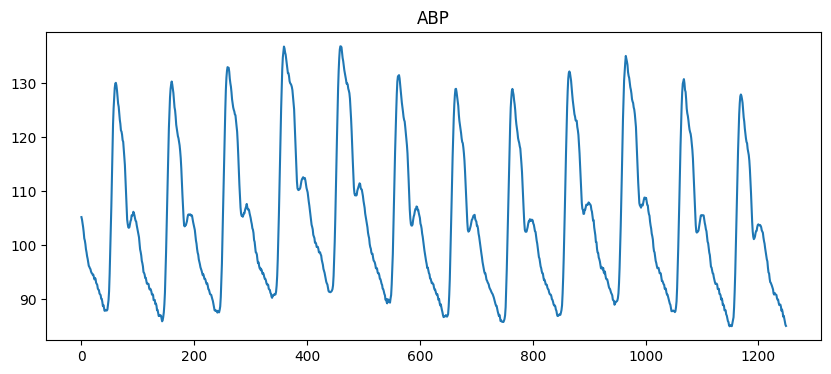

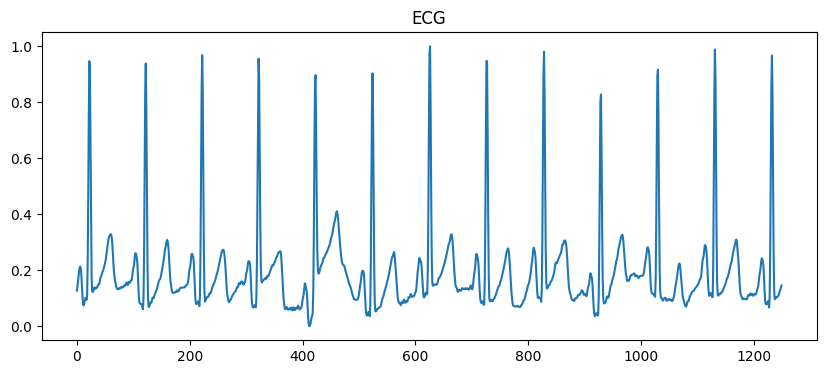

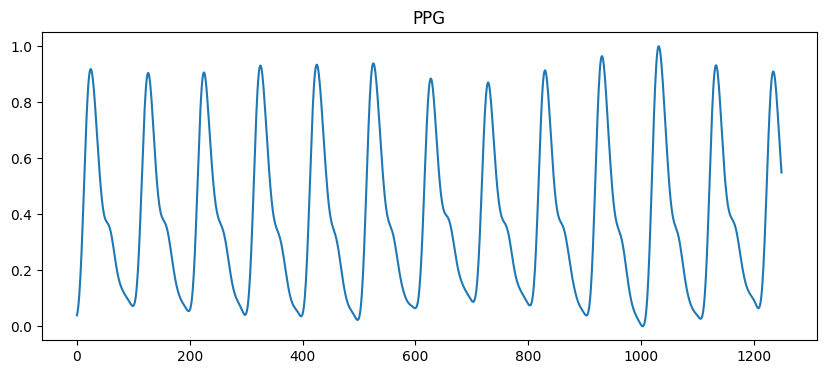

In [9]:
# samples of ABP, ECG, and PPG signals
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(ABP_Train_clean[0])
plt.title('ABP')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(ECG_Train_clean[0])
plt.title('ECG')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(PPG_Train_clean[0])
plt.title('PPG')
plt.show()

In [10]:
# correlation
print("correlation between SBP and DBP = ", df_Train['SBP'].corr(df_Train['DBP']))
import pandas as pd

features = ['Age', 'Height', 'Weight', 'BMI']
targets = ['SBP', 'DBP']

corr_df = pd.DataFrame(index=features, columns=targets)
for feature in features:
    for target in targets:
        corr_df.loc[feature, target] = df_Train[feature].corr(df_Train[target])

corr_df = corr_df.astype(float).round(2)
corr_df

correlation between SBP and DBP =  0.746371978599585


,SBP,DBP
Age,0.08,-0.13
Height,0.04,0.09
Weight,0.05,0.10
BMI,0.05,0.07


In [11]:
# correlation
print("correlation between SBP and DBP = ", df_clean['SBP'].corr(df_clean['DBP']))
import pandas as pd

features = ['Age', 'Height', 'Weight', 'BMI']
targets = ['SBP', 'DBP']

corr_df = pd.DataFrame(index=features, columns=targets)
for feature in features:
    for target in targets:
        corr_df.loc[feature, target] = df_clean[feature].corr(df_clean[target])

corr_df = corr_df.astype(float).round(2)
corr_df

correlation between SBP and DBP =  0.7410472238653135


,SBP,DBP
Age,0.05,-0.17
Height,-0.01,0.05
Weight,0.01,0.07
BMI,0.03,0.05


In [12]:
df_Train_M = df_Train[df_Train['Gender'] == 1]
df_Train_F = df_Train[df_Train['Gender'] == 0]

print("Male:")
print(df_Train_M.info())
print(df_Train_M.describe())

print("Female:")
print(df_Train_F.info())
print(df_Train_F.describe())

Male:
<class 'pandas.core.frame.DataFrame'>
Index: 268560 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      268560 non-null  float64
 1   BMI      268560 non-null  float64
 2   DBP      268560 non-null  float64
 3   Gender   268560 non-null  int64  
 4   Height   268560 non-null  float64
 5   SBP      268560 non-null  float64
 6   Subject  268560 non-null  object 
 7   Weight   268560 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.4+ MB
None
                 Age            BMI            DBP    Gender         Height  \
count  268560.000000  268560.000000  268560.000000  268560.0  268560.000000   
mean       60.398079      22.925959      62.893961       1.0     167.663943   
std        14.309912       3.123985      11.854259       0.0       7.409583   
min         5.000000      12.400000      16.775843       1.0      97.000000   
25%        53.000000      20.800000 

In [13]:
df_clean_M = df_clean[df_clean['Gender'] == 1]
df_clean_F = df_clean[df_clean['Gender'] == 0]

print("Male:")
print(df_clean_M.info())
print(df_clean_M.describe())

print("Female:")
print(df_clean_F.info())
print(df_clean_F.describe())

Male:
<class 'pandas.core.frame.DataFrame'>
Index: 266562 entries, 0 to 465479
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Age      266562 non-null  float64
 1   BMI      266562 non-null  float64
 2   DBP      266562 non-null  float64
 3   Gender   266562 non-null  int64  
 4   Height   266562 non-null  float64
 5   SBP      266562 non-null  float64
 6   Subject  266562 non-null  object 
 7   Weight   266562 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 18.3+ MB
None
                 Age            BMI            DBP    Gender         Height  \
count  266562.000000  266562.000000  266562.000000  266562.0  266562.000000   
mean       60.673243      22.973055      63.026799       1.0     167.937228   
std        13.859035       3.064282      11.705068       0.0       6.261429   
min        11.000000      14.200000      30.003556       1.0     139.700000   
25%        54.000000      20.900000 

#2. Blood Pressure Prediction


In [1]:
# load the data
# the subject information is stored in a pandas df
# the Signals (ECG, PPG, ABP) are stored in numpy arrays
# this block takes 11 minutes to execute

# !cat /proc/meminfo

!pip install mat73
import mat73
import pandas as pd
import numpy as np

def load_mat_file(file_path):
    data_dict = mat73.loadmat(file_path)['Subset']
    print('finished loading'+file_path)
    # print(data_dict.keys())

    # first handle Signals
    ECG = data_dict['Signals'][:,0,:]
    PPG = data_dict['Signals'][:,1,:]
    ABP = data_dict['Signals'][:,2,:]
    data_dict.pop("Signals", None)

    data_dict['Age'] = data_dict['Age'].tolist()
    data_dict['BMI'] = data_dict['BMI'].tolist()
    data_dict['DBP'] = data_dict['DBP'].tolist()
    data_dict['Gender'] = [1 if x[0] == 'M' else 0 for x in data_dict['Gender']]
    data_dict['Height'] = data_dict['Height'].tolist()
    data_dict['SBP'] = data_dict['SBP'].tolist()
    data_dict['Subject'] = [x[0] for x in data_dict['Subject']]
    data_dict['Weight'] = data_dict['Weight'].tolist()

    data_df = pd.DataFrame(data_dict)
    print('constructed df')

    return data_df, ECG, PPG, ABP

import os, glob
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/pulsedb/"

df_CalBased_Test, ECG_CalBased_Test, PPG_CalBased_Test, ABP_CalBased_Test = load_mat_file(DATA_DIR+'VitalDB_CalBased_Test_Subset.mat')
df_Train, ECG_Train, PPG_Train, ABP_Train = load_mat_file(DATA_DIR+'VitalDB_AAMI_Cal_Subset.mat')

Mounted at /content/drive
finished loading/content/drive/MyDrive/pulsedb/VitalDB_CalBased_Test_Subset.mat
constructed df
finished loading/content/drive/MyDrive/pulsedb/VitalDB_AAMI_Cal_Subset.mat
constructed df


In [2]:
df_Train = df_Train[df_Train["Age"]<=40]
keep_idx = df_Train.index.to_numpy()

ECG_Train = ECG_Train[keep_idx]
PPG_Train = PPG_Train[keep_idx]

df_CalBased_Test = df_CalBased_Test[df_CalBased_Test["Age"]<=40]
keep_idx_CalBased = df_CalBased_Test.index.to_numpy()

ECG_CalBased_Test = ECG_CalBased_Test[keep_idx_CalBased]
PPG_CalBased_Test = PPG_CalBased_Test[keep_idx_CalBased]

In [3]:
print(df_Train.describe())
print(ECG_Train.shape)
print(PPG_Train.shape)

               Age          BMI          DBP      Gender       Height  \
count  8346.000000  8346.000000  8346.000000  8346.00000  8346.000000   
mean     31.903067    23.409226    61.529495     0.81596   173.498167   
std       7.287789     2.802479    12.953674     0.38754     5.566229   
min      16.000000    19.800000    21.527198     0.00000   147.400000   
25%      28.000000    20.900000    52.960457     1.00000   168.300000   
50%      35.000000    24.200000    60.416300     1.00000   174.500000   
75%      38.000000    25.900000    68.597130     1.00000   176.600000   
max      40.000000    27.800000   256.307481     1.00000   183.900000   

               SBP       Weight  
count  8346.000000  8346.000000  
mean    110.569103    70.826072  
std      17.958370    11.061530  
min      43.117861    47.650000  
25%      98.127863    62.650000  
50%     110.186975    73.600000  
75%     121.191866    79.700000  
max     263.384904    89.050000  
(8346, 1250)
(8346, 1250)


In [12]:
import numpy as np
from sklearn.metrics import r2_score
def get_metrics(test, pred):
  ME = np.mean(np.abs(test - pred))
  SDE = np.std(np.abs(test - pred), ddof=1)
  MAE = np.mean(np.abs(test - pred))
  R2 = r2_score(test, pred)
  return ME, SDE, MAE, R2

import matplotlib.pyplot as plt
def plot_true_vs_pred(test, pred, title):
  plt.figure(figsize=(6,6), alpha=0.3)
  plt.scatter(test, pred)
  plt.plot([min(test), max(test)], [min(test), max(test)], 'r--')  # y=x line
  plt.xlabel('True')
  plt.ylabel('Predicted')
  plt.title(title)
  plt.show()

Time taken: 143.02863430976868
  Variable         ME        SDE        MAE        R2
0      SBP  14.846946  11.667179  14.846946 -0.003828
1      DBP   9.384771   7.389381   9.384771  0.020693


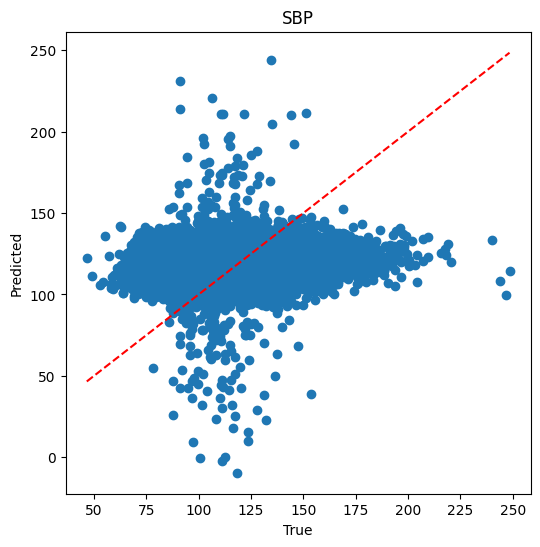

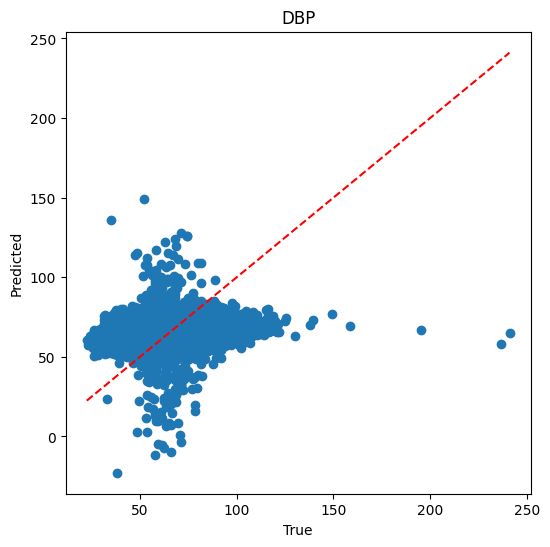

In [14]:
# predict DBP/SBP from ECG and PPG

# baseline linear model
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

def linear_model(ECG_train, PPG_train, df_train, ECG_test, PPG_test, df_test):
    start = time.time()
    model_DBP = LinearRegression()
    model_SBP = LinearRegression()
    model_DBP.fit(np.concatenate((ECG_train, PPG_train), axis=1), df_train['DBP'])
    model_SBP.fit(np.concatenate((ECG_train, PPG_train), axis=1), df_train['SBP'])
    end = time.time()
    DBP_pred = model_DBP.predict(np.concatenate((ECG_test, PPG_test), axis=1))
    SBP_pred = model_SBP.predict(np.concatenate((ECG_test, PPG_test), axis=1))

    print("Time taken:", end - start)

    # report the ME, SDE, MAE, and R2.
    DBP_ME, DBP_SDE, DBP_MAE, DBP_R2 = get_metrics(df_test['DBP'], DBP_pred)
    SBP_ME, SBP_SDE, SBP_MAE, SBP_R2 = get_metrics(df_test['SBP'], SBP_pred)

    metrics = {
    'Variable': ['SBP', 'DBP'],
    'ME': [SBP_ME, DBP_ME],
    'SDE': [SBP_SDE, DBP_SDE],
    'MAE': [SBP_MAE, DBP_MAE],
    'R2': [SBP_R2, DBP_R2]
    }

    df_metrics = pd.DataFrame(metrics)
    print(df_metrics)

    # Make plots of the true DBP/SBP vs. estimated DBP/SBP.
    plot_true_vs_pred(df_test['SBP'], SBP_pred, 'SBP')
    plot_true_vs_pred(df_test['DBP'], DBP_pred, 'DBP')

linear_model(ECG_Train, PPG_Train, df_Train, ECG_CalBased_Test, PPG_CalBased_Test, df_CalBased_Test)

In [8]:
# wrap in PyTorch TensorDatasets and DataLoaders
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd

# ECG_tr, ECG_val, PPG_tr, PPG_val, y_tr, y_val = train_test_split(ECG_Train, PPG_Train, df_Train[['SBP','DBP']], test_size=0.1, random_state=42)
# train-val split

subjects = df_Train['Subject'].unique()

val_indices = []
train_indices = []

for sid in subjects:
    idx = np.where(df_Train['Subject'] == sid)[0]

    n = len(idx)
    val_n = max(0, int(n * 0.1))

    # last 10%
    val_idx = idx[-val_n:]
    # first 90%
    train_idx = idx[:-val_n]

    val_indices.extend(val_idx)
    train_indices.extend(train_idx)

val_indices   = np.array(val_indices)
train_indices = np.array(train_indices)

ECG_tr = ECG_Train[train_indices]
PPG_tr = PPG_Train[train_indices]
df_tr   = df_Train.iloc[train_indices]

ECG_val   = ECG_Train[val_indices]
PPG_val   = PPG_Train[val_indices]
df_val     = df_Train.iloc[val_indices]

print("Train samples:", len(train_indices))
print("Validation samples:", len(val_indices))


def BPDataset(ECG, PPG, y, shuffle):
    X = np.stack([ECG, PPG], axis=1)  # (num_samples, 2, seq_len)
    ds = TensorDataset(torch.from_numpy(X.astype(np.float32)), torch.from_numpy(y.values.astype(np.float32)))
    return DataLoader(ds, batch_size=32, shuffle=shuffle)

train_loader = BPDataset(ECG_tr, PPG_tr, df_tr[['SBP','DBP']], shuffle=True)
val_loader   = BPDataset(ECG_val, PPG_val, df_val[['SBP','DBP']], shuffle=False)
test_loader  = BPDataset(ECG_CalBased_Test, PPG_CalBased_Test, df_CalBased_Test[['SBP','DBP']], shuffle=False)



Train samples: 7512
Validation samples: 834


In [15]:
# training function
import time

def evaluate_loop(model, val_loader, loss_fn):
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            val_loss += loss_fn(pred, y).item()
    val_loss /= len(val_loader)
    return val_loss

def train_model(model, train_loader, val_loader, epochs=300, lr=0.001, loss_fn = nn.MSELoss()):
    model = model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # early stopping setting
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    tol = 0.0001

    n_epochs = epochs
    start = time.time()
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss /= len(train_loader)

        # validation
        val_loss = evaluate_loop(model, val_loader, loss_fn)

        # early stopping
        if best_val_loss - val_loss >= tol:
          best_val_loss = val_loss
          patience_counter = 0
          torch.save(model.state_dict(), "best_model.pt")
        else:
          patience_counter += 1
          if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")
          if patience_counter >= patience:
            n_epochs = epoch+1 - patience
            # print("Early stopping triggered!")
            break
    end = time.time()
    model.load_state_dict(torch.load("best_model.pt"))

    return model, end - start, n_epochs

def predict(model, test_loader):
    model.eval()
    preds = []
    with torch.test_loader():
        for X, y in test_loader:
            X = X.to(device)
            out = model(X).cpu().numpy()
            preds.append(out)
    return np.vstack(preds)


In [4]:
# models of increasing complexity

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# fully connected NN
class FCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(
            nn.Linear(1250*2, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # SBP, DBP
        )
    def forward(self, x):
        x = self.flatten(x)
        return self.fc(x)

NameError: name 'torch' is not defined

In [3]:
# evaluate models

fcnn_model = FCNN()
fcnn_model, time, n_epochs = train_model(fcnn_model, train_loader, val_loader)
y_pred = predict(fcnn_model, test_loader)
DBP_pred = y_pred[:,0].detach().numpy()
SBP_pred = y_pred[:,1].detach().numpy()

# report the ME, SDE, MAE, and R2.
DBP_ME, DBP_SDE, DBP_MAE, DBP_R2 = get_metrics(df_CalBased_Test['DBP'], DBP_pred)
SBP_ME, SBP_SDE, SBP_MAE, SBP_R2 = get_metrics(df_CalBased_Test['SBP'], SBP_pred)

metrics = {
'Variable': ['SBP', 'DBP'],
'ME': [SBP_ME, DBP_ME],
'SDE': [SBP_SDE, DBP_SDE],
'MAE': [SBP_MAE, DBP_MAE],
'R2': [SBP_R2, DBP_R2]
}

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# Make plots of the true DBP/SBP vs. estimated DBP/SBP.
plot_true_vs_pred(df_CalBased_Test['SBP'], SBP_pred, 'SBP')
plot_true_vs_pred(df_CalBased_Test['DBP'], DBP_pred, 'DBP')

NameError: name 'FCNN' is not defined

#3. Generative Modeling

In [ ]:
# your code here